In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [10]:
import pandas as pd
df = pd.read_csv(r"D:\netflix\NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [11]:
print("Null values per column:\n", df.isnull().sum())

Null values per column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [12]:
df_cleaned = df.dropna(axis=1, how='all')

In [13]:
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':  # Categorical
        df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)
    else:  # Numerical
        df_cleaned[column].fillna(df_cleaned[column].mean(), inplace=True)

In [14]:
df_cleaned.drop_duplicates(inplace=True)

In [15]:
print("Null values after cleaning:\n", df_cleaned.isnull().sum())
print("Cleaned dataset shape:", df_cleaned.shape)

Null values after cleaning:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Cleaned dataset shape: (5044, 7)


In [16]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


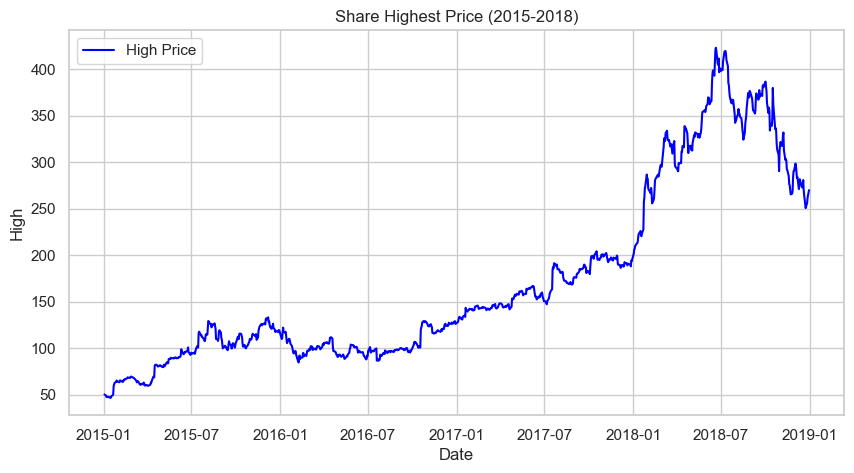

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

df_filtered = df[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2018-12-31')]


sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))


sns.lineplot(data=df_filtered, x='Date', y='High', label='High Price', color='blue')


plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price (2015-2018)')


plt.show()

C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


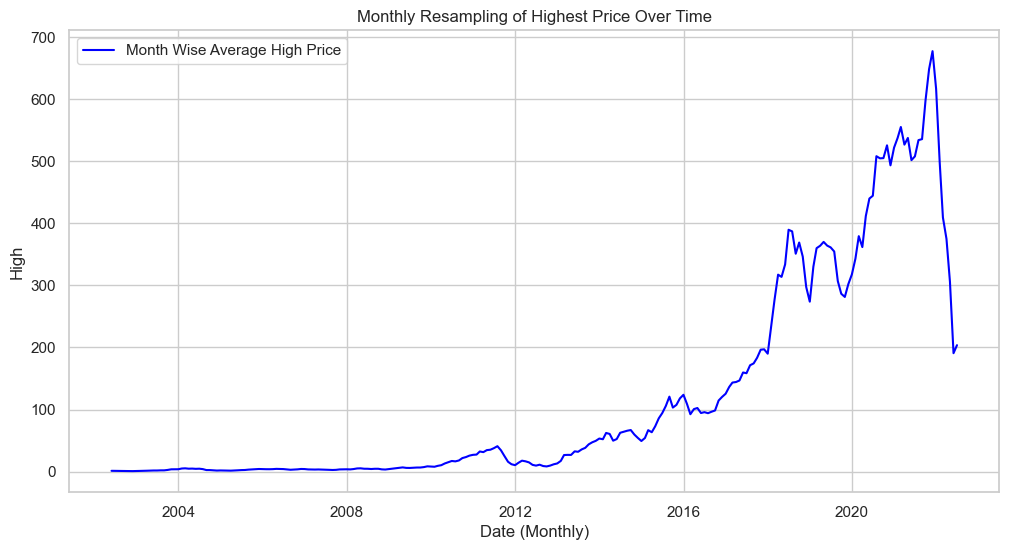

In [28]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

df_resampled = df.resample('M').mean()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling of Highest Price Over Time')

plt.show()

In [34]:
print(df.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [35]:
# If you see something like ' date ' or 'DATE', rename it
df.rename(columns={'YourActualDateColumn': 'Date'}, inplace=True)


<Figure size 1200x600 with 0 Axes>

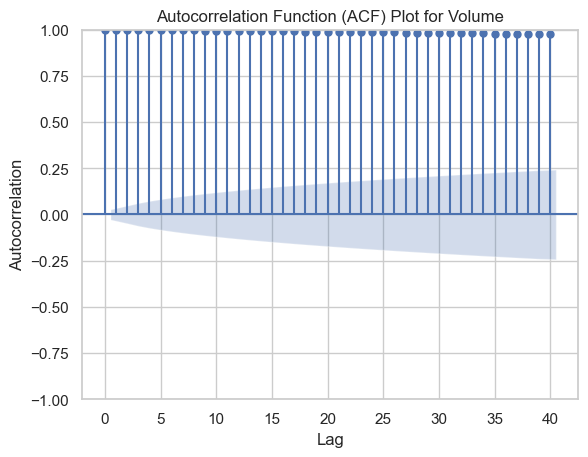

In [46]:
# Example: Adding a Date column with a date range
df['Date'] = pd.date_range(start='2015-01-01', periods=len(df), freq='D')  # assuming daily frequency

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Continue with plotting or other operations
# Plot ACF without needing a 'Date' column
plt.figure(figsize=(12, 6))
plot_acf(df['Adj Close'], lags=40)  # You can adjust the lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot for Volume')
plt.show()


In [47]:
from statsmodels.tsa.stattools import adfuller
 
# Assuming df is your DataFrame
result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.3065149611308333
p-value: 0.626186465065788
Critical Values: {'1%': -3.4316556581508197, '5%': -2.862116959995152, '10%': -2.567077116457145}


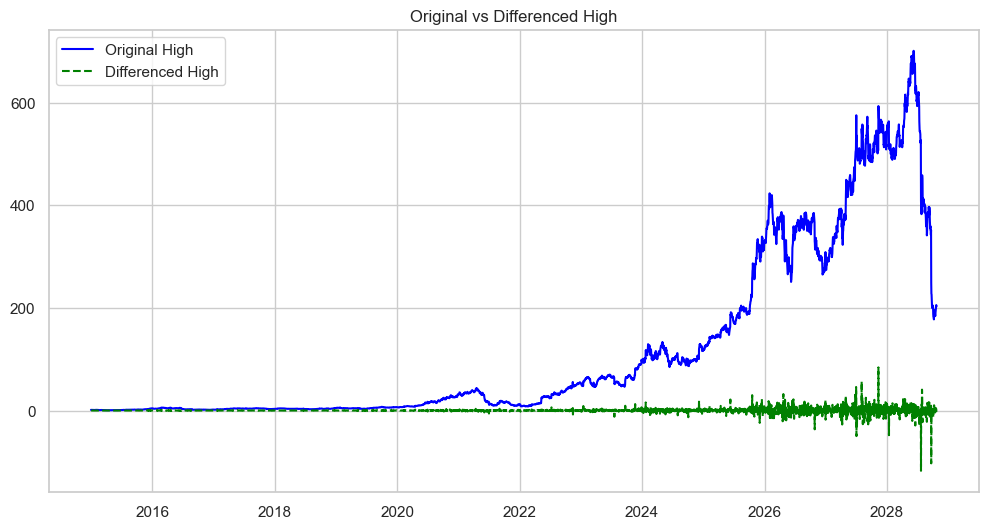

In [48]:
df['high_diff'] = df['High'].diff()
 
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

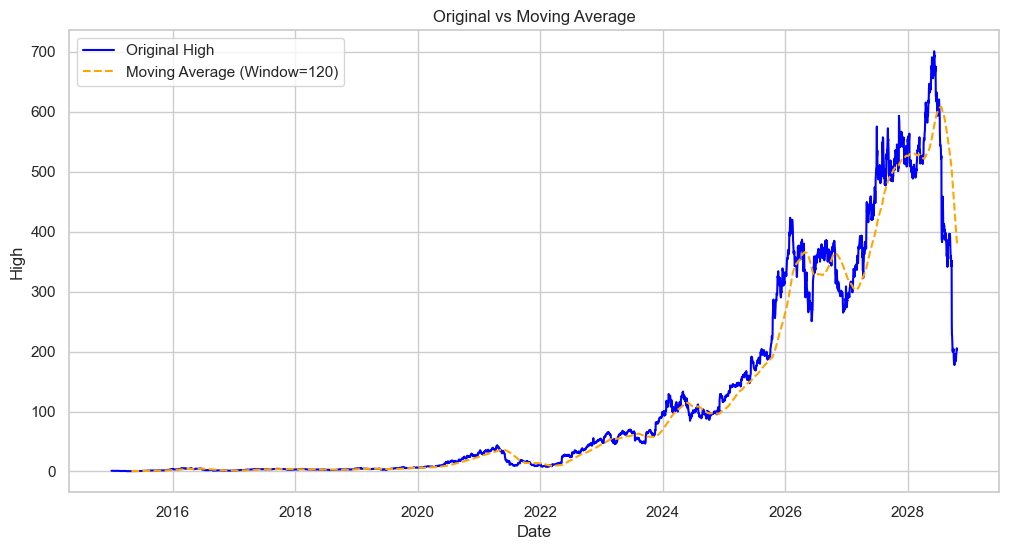

In [49]:
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()
 
# Plotting
plt.figure(figsize=(12, 6))
 
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')
 
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [50]:
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)
 
# Display the combined DataFrame
print(df_combined.head())

                High  high_diff
Date                           
2015-01-01  1.242857        NaN
2015-01-02  1.225000  -0.017857
2015-01-03  1.232143   0.007143
2015-01-04  1.164286  -0.067857
2015-01-05  1.107857  -0.056429


In [51]:
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

Date
2015-01-02   -0.017857
2015-01-03    0.007143
2015-01-04   -0.067857
2015-01-05   -0.056429
2015-01-06   -0.029286
Name: high_diff, dtype: float64

In [52]:
from statsmodels.tsa.stattools import adfuller
 
# Assuming df is your DataFrame
result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -10.500474387199182
p-value: 1.087326632380644e-18
Critical Values: {'1%': -3.4316559188949403, '5%': -2.8621170751906178, '10%': -2.567077177780168}


C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

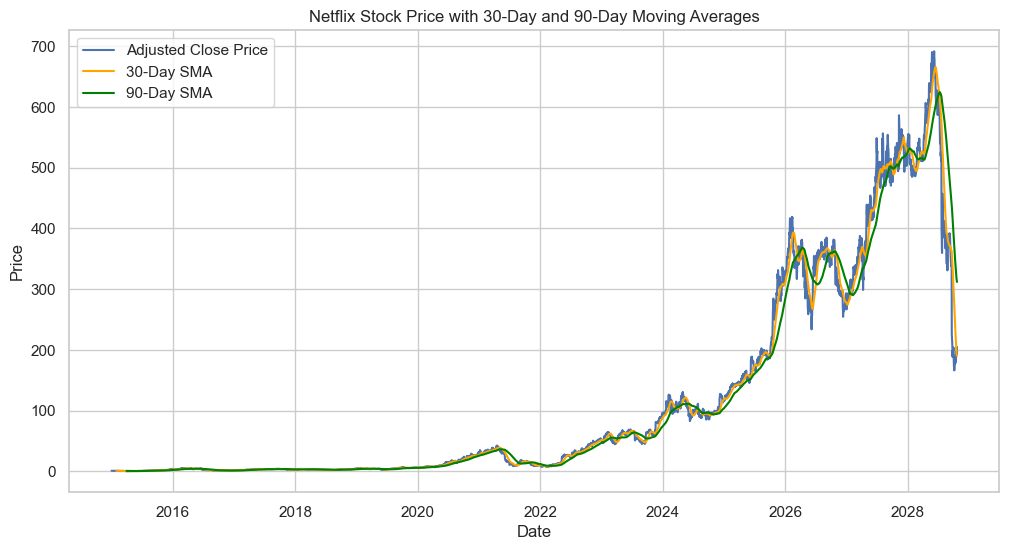

In [53]:
df['SMA_30'] = df['Adj Close'].rolling(window=30).mean()  # 30-day Simple Moving Average
df['SMA_90'] = df['Adj Close'].rolling(window=90).mean()  # 90-day Simple Moving Average

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Adj Close', label='Adjusted Close Price')
sns.lineplot(data=df, x=df.index, y='SMA_30', label='30-Day SMA', color='orange')
sns.lineplot(data=df, x=df.index, y='SMA_90', label='90-Day SMA', color='green')
plt.title('Netflix Stock Price with 30-Day and 90-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## The relationship between sentiment expressed in news articles or social media posts and the fluctuations in Netflix's stock price

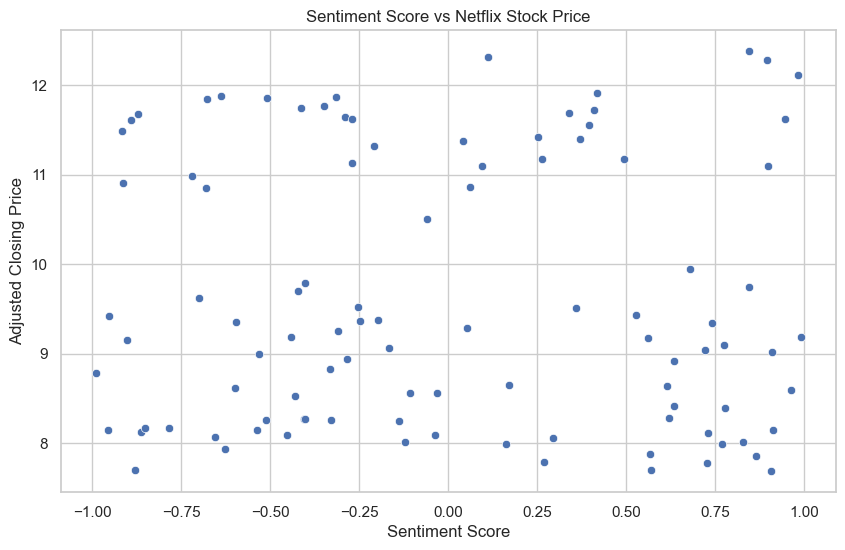

                 Sentiment_Score  Adj Close
Sentiment_Score         1.000000  -0.031792
Adj Close              -0.031792   1.000000


In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Example sentiment data (from social media or news), containing 'Date' and 'Sentiment_Score'
# This is just mock data; you would replace it with actual sentiment scores
sentiment_data = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Sentiment_Score': np.random.uniform(-1, 1, 100)
})

# Convert dates to the same format as stock data and set the index
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])
sentiment_data.set_index('Date', inplace=True)

# Merging sentiment data with Netflix stock data
df_sentiment_merged = pd.merge(df[['Adj Close']], sentiment_data, left_index=True, right_index=True)

# Scatterplot of sentiment scores vs stock prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment_Score', y='Adj Close', data=df_sentiment_merged)
plt.title('Sentiment Score vs Netflix Stock Price')
plt.xlabel('Sentiment Score')
plt.ylabel('Adjusted Closing Price')
plt.show()

# Correlation between sentiment and stock price
correlation = df_sentiment_merged[['Sentiment_Score', 'Adj Close']].corr()
print(correlation)


## Analyze how shifts in sentiment impact volatility in Netflix's stock. This helps to assess whether emotional market reactions influence fluctuations in stock prices.

C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

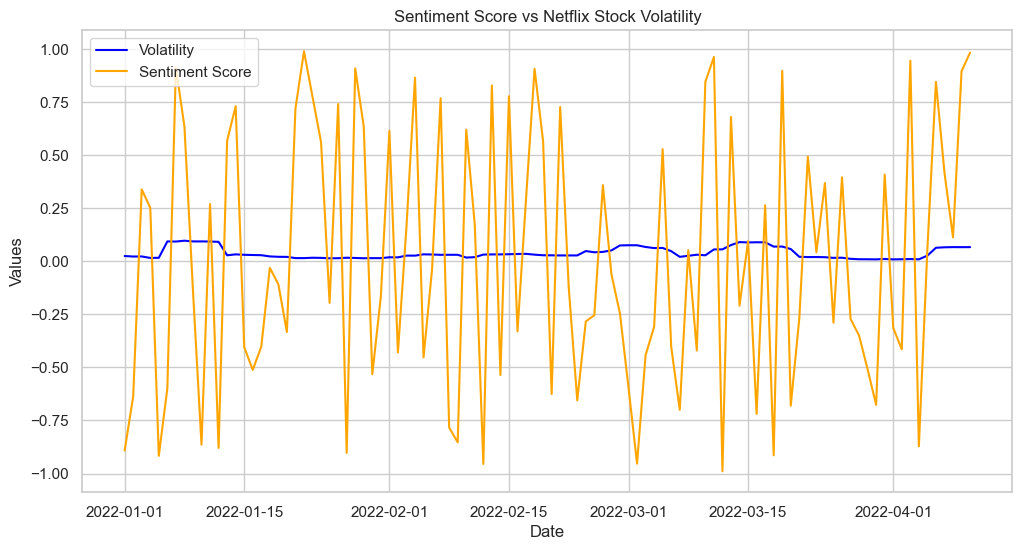

In [65]:
# Calculate daily returns and rolling volatility (standard deviation)
df['Daily_Return'] = df['Adj Close'].pct_change()
df['Volatility'] = df['Daily_Return'].rolling(window=7).std()  # 7-day rolling volatility

# Merge volatility with sentiment data
df_volatility_sentiment = pd.merge(df[['Volatility']], sentiment_data, left_index=True, right_index=True)

# Plotting sentiment score and volatility together
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_volatility_sentiment, x=df_volatility_sentiment.index, y='Volatility', label='Volatility', color='blue')
sns.lineplot(data=df_volatility_sentiment, x=df_volatility_sentiment.index, y='Sentiment_Score', label='Sentiment Score', color='orange')
plt.title('Sentiment Score vs Netflix Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


NameError: name 'df_nasdaq' is not defined

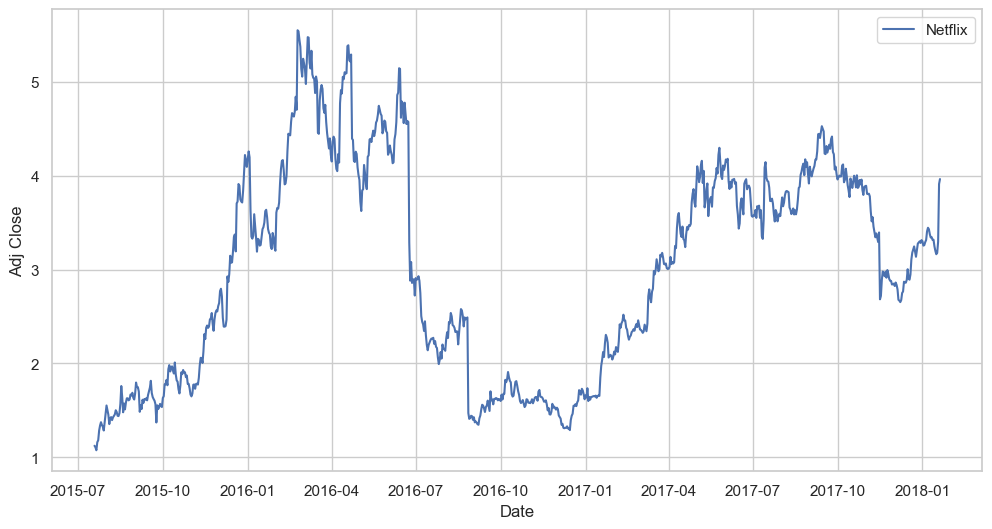

In [71]:
# Plot Netflix stock vs NASDAQ for key event periods (example: earnings report dates)
event_dates = ['2015-07-19', '2018-01-20']  # Replace with actual event dates
df_events = df.loc[event_dates[0]:event_dates[1]]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_events, x=df_events.index, y='Adj Close', label='Netflix')
sns.lineplot(data=df_nasdaq.loc[event_dates[0]:event_dates[1]], x=df_nasdaq.index, y='Adj Close', label='NASDAQ', color='green')
plt.title('Netflix Stock Performance vs NASDAQ During Key Events')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()
